In [4]:
print("""
Immadi Shyam Prasad    (AM.EN.U4CSE19164)
D B R S Praneeth Varma (AM.EN.U4CSE19265)
D S K Phani Chyavan    (AM.EN.U4CSE19163)
""")



Immadi Shyam Prasad    (AM.EN.U4CSE19164)
D B R S Praneeth Varma (AM.EN.U4CSE19265)
D S K Phani Chyavan    (AM.EN.U4CSE19163)



In [1]:

import torch
import torchvision
from torchvision import transforms, datasets
import os
import matplotlib.pyplot as plt
import numpy as np

#https://www.kaggle.com/c/state-farm-distracted-driver-detection/data

#path of test,train,validation
train_dataset_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/teslagpu/code/Users/shyamimmadi7/project1/imgs1/train"
test_dataset_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/teslagpu/code/Users/shyamimmadi7/project1/imgs1/test"
val_dataset_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/teslagpu/code/Users/shyamimmadi7/project1/imgs1/val"



mean = [0.3124, 0.3782, 0.3708] # found by caliculation net.batch_mean_and_sd(train_loader)
std = [0.2778, 0.3213, 0.3222]

#data argumentaion resizing,normalizing,converting to tensor

train_transforms = transforms.Compose([transforms.Resize((80,80)),transforms.ToTensor(),transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))])
test_transforms = transforms.Compose([transforms.Resize((80,80)),transforms.ToTensor(),transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))])
val_transforms = transforms.Compose([transforms.Resize((80,80)),transforms.ToTensor(),transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))])


train_dataset = datasets.ImageFolder(root=train_dataset_path,transform=train_transforms)
test_dataset = datasets.ImageFolder(root=test_dataset_path,transform=test_transforms)
val_dataset = datasets.ImageFolder(root=val_dataset_path,transform=val_transforms)

#data loading
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size=10 ,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size=10 ,shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset,batch_size=10 ,shuffle=True)





Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([5, 6, 3, 0, 6, 1])
torch.Size([18, 6400])


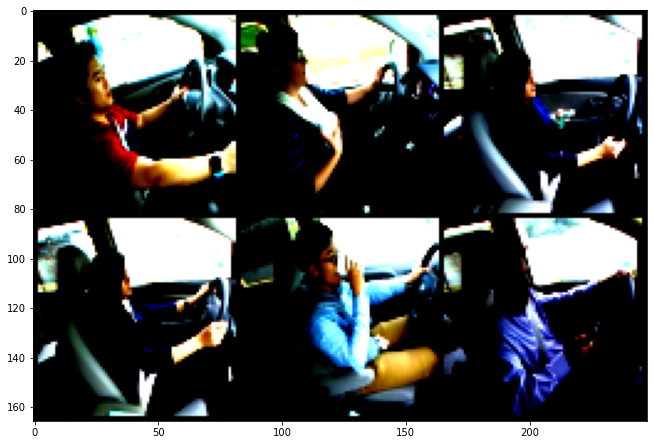

In [2]:
#function for printing images in grid
def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset, batch_size=6,shuffle=True)
  for data in loader:
    images , labels = data
    break
  print(labels)
  print(images.view(-1,80*80).shape)
  grid = torchvision.utils.make_grid(images,nrow=3)
  plt.figure(figsize=(11,11))
  plt.imshow(np.transpose(grid,(1,2,0)))
  plt.show()
  

show_transformed_images(train_dataset)

In [3]:
torch.cuda.is_available()

True

In [4]:
import torch.nn as nn
import torch.nn.functional as F

#Net inheriting from nn. module
class Net(nn.Module):
      def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*80*80,100)
        self.fc2 = nn.Linear(100,100)
        self.fc3 = nn.Linear(100,60)
        self.fc4 = nn.Linear(60,10)

      def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x,dim=1)
    
      def batch_mean_and_sd(self,loader):

        cnt = 0
        fst_moment = torch.empty(3)
        snd_moment = torch.empty(3)

        for images, _ in loader:
            b, c, h, w = images.shape
            nb_pixels = b * h * w
            sum_ = torch.sum(images, dim=[0, 2, 3])
            sum_of_square = torch.sum(images ** 2,
                                      dim=[0, 2, 3])
            fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
            snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)
            cnt += nb_pixels

        mean, std = fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)        
        print("mean and std: \n", mean, std)

net = Net()
print(net)

#gpu usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
    


Net(
  (fc1): Linear(in_features=19200, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=60, bias=True)
  (fc4): Linear(in_features=60, out_features=10, bias=True)
)


Net(
  (fc1): Linear(in_features=19200, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=60, bias=True)
  (fc4): Linear(in_features=60, out_features=10, bias=True)
)

In [5]:
# net.batch_mean_and_sd(train_loader)


In [6]:
x1,y1 = next(iter(train_loader)) #checking the tensor values of 1st image in batch
x1[0]

tensor([[[-0.0940,  0.0189,  0.0612,  ...,  1.0917,  1.2188,  0.4283],
         [ 0.8094,  1.1764,  1.5294,  ...,  1.0917,  1.2188,  0.9788],
         [ 1.7835,  1.6988,  1.6423,  ...,  1.1482,  1.1623,  1.2470],
         ...,
         [-1.0399, -1.0399, -1.0399,  ..., -0.6022, -0.8705, -0.9128],
         [-1.0399, -1.0399, -1.0399,  ..., -0.4893, -0.8563, -0.8987],
         [-1.0399, -1.0399, -1.0540,  ..., -0.7293, -0.9128, -0.9128]],

        [[-0.1396, -0.0420, -0.0176,  ...,  1.7522,  1.7034,  0.6781],
         [ 0.7269,  1.0199,  1.2762,  ...,  1.7034,  1.7766,  1.3616],
         [ 1.8742,  1.7522,  1.6667,  ...,  1.7400,  1.8132,  1.7888],
         ...,
         [-1.0917, -1.0917, -1.0917,  ..., -0.6523, -0.9940, -1.0550],
         [-1.0917, -1.0917, -1.0917,  ..., -0.5790, -0.9696, -1.0306],
         [-1.0917, -1.0917, -1.1039,  ..., -0.8475, -0.9940, -1.0062]],

        [[-0.3962, -0.2989, -0.2867,  ...,  1.8798,  1.7824,  0.8087],
         [ 0.3949,  0.6870,  0.9913,  ...,  1

In [7]:
#training model
#printing loss at each epoch

In [13]:
import torch.optim as optim


optimizer = optim.Adam(net.parameters(),lr = 0.001)

EPOCHS = 3
for i in range(EPOCHS):
    for data in train_loader:
        x1, y1 = data
        y1 = y1.to(device)
        net.zero_grad()
        output = net(x1.view(-1,3*80*80).to(device))
        loss = F.nll_loss(output,y1)
        loss.backward()
        optimizer.step()
    print(loss)



tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)


In [19]:
#validating model
correct = 0
total = 0

for data in val_loader:
    x, y = data
    output = net(x.view(-1,3*80*80).to(device))
    for idx, i in enumerate(output):
        if torch.argmax(i) == y[idx]:
            correct += 1
        total += 1    
print('accuracy:\t',round(correct/total,3))

accuracy:	 0.951


In [20]:
#testing model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        x, y = data
        output = net(x.view(-1,3*80*80).to(device))
        for idx, i in enumerate(output):
          if torch.argmax(i) == y[idx]:
            correct += 1
          total += 1
    print('accuracy:\t',round(correct/total,3))

accuracy:	 0.936


In [21]:
x, y = next(iter(test_loader)) 

In [22]:
x[0]

tensor([[[-0.5740, -0.4752, -0.1646,  ...,  1.4729,  1.9246,  2.2069],
         [-0.2634,  0.4283, -0.2211,  ...,  1.6846,  1.9952,  2.1222],
         [-0.5740,  0.0330, -0.7011,  ...,  1.8964,  1.9529,  2.0234],
         ...,
         [-0.6305, -0.4893, -0.4470,  ..., -0.8846, -0.8705, -0.8705],
         [-0.5175, -0.4611, -0.4187,  ..., -0.8987, -0.8846, -0.8563],
         [-0.4328, -0.4470, -0.4187,  ..., -0.8846, -0.8705, -0.8563]],

        [[-0.6034, -0.4936, -0.2129,  ...,  1.8376,  1.9109,  1.9231],
         [-0.3471,  0.2387, -0.3593,  ...,  1.8742,  1.9353,  1.9109],
         [-0.6156, -0.1030, -0.7133,  ...,  1.9353,  1.9231,  1.9109],
         ...,
         [-0.5180, -0.4204, -0.4082,  ..., -0.9940, -0.9818, -0.9818],
         [-0.4570, -0.3960, -0.3715,  ..., -1.0062, -0.9940, -0.9696],
         [-0.4204, -0.3715, -0.3471,  ..., -0.9940, -0.9818, -0.9696]],

        [[-0.7370, -0.6153, -0.3719,  ...,  1.8920,  1.9163,  1.9407],
         [-0.3232,  0.2367, -0.4327,  ...,  1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)


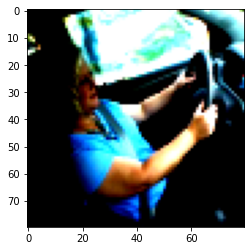

In [23]:
#checking for single images

print(y[8])
plt.imshow(np.transpose(x[8],(1,2,0)))
plt.show()

In [25]:
output = net(x[8].view(-1,3*80*80).to(device))
print(torch.argmax(output))

tensor(0, device='cuda:0')
